# <center> Disney Studio Income Analysis

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel("/content/disney_movies.xlsx")
df

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485.0,5.228953e+09
1,Pinocchio,1940-02-09,Adventure,G,84300000.0,2.188229e+09
2,Fantasia,1940-11-13,Musical,G,83320000.0,2.187091e+09
3,Song of the South,1946-11-12,Adventure,G,65000000.0,1.078511e+09
4,Cinderella,1950-02-15,Drama,G,85000000.0,9.206087e+08
...,...,...,...,...,...,...
574,The Light Between Oceans,2016-09-02,Drama,PG-13,12545979.0,1.254598e+07
575,Queen of Katwe,2016-09-23,Drama,PG,8874389.0,8.874389e+06
576,Doctor Strange,2016-11-04,Adventure,PG-13,232532923.0,2.325329e+08
577,Moana,2016-11-23,Adventure,PG,246082029.0,2.460820e+08


## Task 1: Data Exploration

Checking Null Values , release_date into datatime , best & worst total gross

In [ ]:
#Checking Null Values
df.isnull().sum() 

movie_title                  0
release_date                 0
genre                       17
mpaa_rating                 56
total_gross                  0
inflation_adjusted_gross     0
dtype: int64

In [ ]:
# release_date into datatime
df['release_date'] = pd.to_datetime(df['release_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   movie_title               579 non-null    object        
 1   release_date              579 non-null    datetime64[ns]
 2   genre                     562 non-null    object        
 3   mpaa_rating               523 non-null    object        
 4   total_gross               579 non-null    float64       
 5   inflation_adjusted_gross  579 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 27.3+ KB


In [ ]:
#Worst Gross
df.sort_values('total_gross',ascending=True).head(1)

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
27,Amy,1981-03-20,Drama,NaN,0.0,0.0


In [ ]:
#Best Gross
df.sort_values('total_gross',ascending=False).head(1)

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
564,Star Wars Ep. VII: The Force Awakens,2015-12-18,Adventure,PG-13,936662225.0,936662225.0


In [ ]:
#best & worst total gross
df.sort_values('total_gross',ascending=False)

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
564,Star Wars Ep. VII: The Force Awakens,2015-12-18,Adventure,PG-13,936662225.0,936662225.0
524,The Avengers,2012-05-04,Action,PG-13,623279547.0,660081224.0
578,Rogue One: A Star Wars Story,2016-12-16,Adventure,PG-13,529483936.0,529483936.0
571,Finding Dory,2016-06-17,Adventure,PG,486295561.0,486295561.0
558,Avengers: Age of Ultron,2015-05-01,Action,PG-13,459005868.0,459005868.0
...,...,...,...,...,...,...
511,Zokkomon,2011-04-22,Adventure,PG,2815.0,2984.0
20,The Many Adventures of Winnie the Pooh,1977-03-11,NaN,NaN,0.0,0.0
29,Condorman,1981-08-07,Action,NaN,0.0,0.0
355,Frank McKlusky C.I.,2002-01-01,NaN,NaN,0.0,0.0


## Task 2: Visualize Year Distribution Plot

In [ ]:
df['year'] = df['release_date'].dt.date.astype(str).str.split('-', expand=True)[0]
df.head()

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross,year
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485.0,5.228953e+09,1937
1,Pinocchio,1940-02-09,Adventure,G,84300000.0,2.188229e+09,1940
2,Fantasia,1940-11-13,Musical,G,83320000.0,2.187091e+09,1940
3,Song of the South,1946-11-12,Adventure,G,65000000.0,1.078511e+09,1946
4,Cinderella,1950-02-15,Drama,G,85000000.0,9.206087e+08,1950


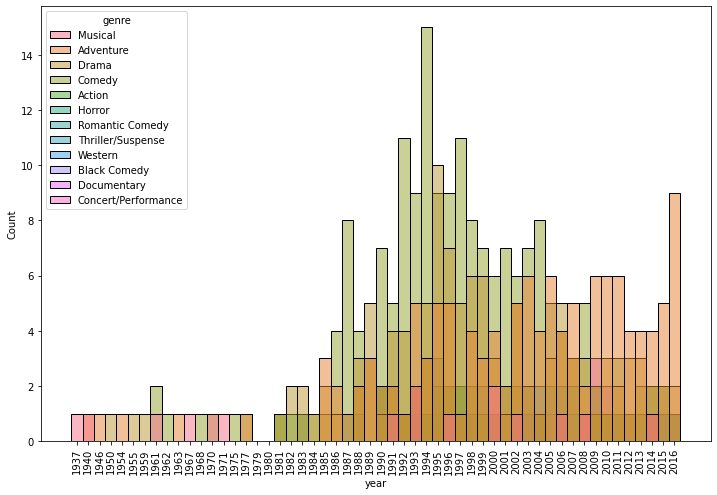

In [ ]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
sns.histplot(x='year',hue='genre',data=df)

## Task 3: Does Movies Income Decreased or Increased?

**MOVIES ARE INCREASED**

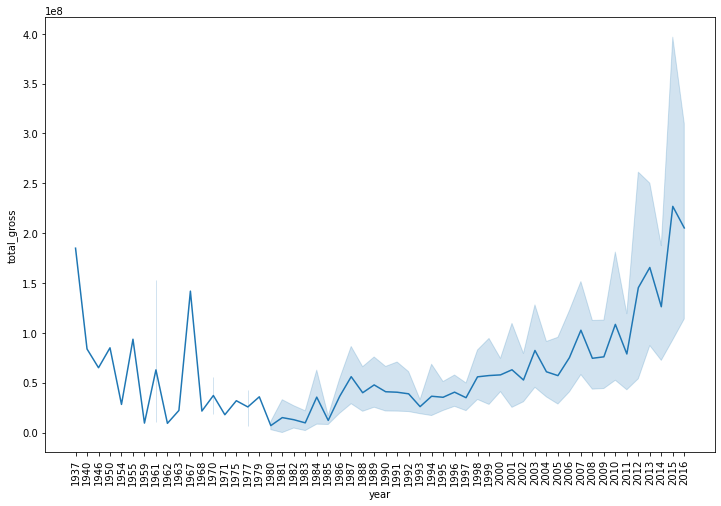

In [ ]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
sns.lineplot(x='year', y='total_gross', data=df)

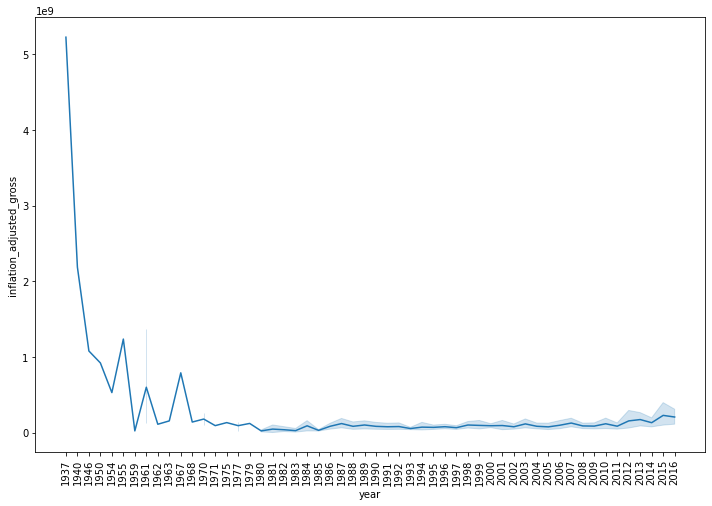

In [ ]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
sns.lineplot(x='year', y='inflation_adjusted_gross', data=df)

## Task 4: Describe the total counts of Genres

In [ ]:
unique_df = pd.unique(df.genre) #To Find Unique Value of the coulmn
print(unique_df)

['Musical' 'Adventure' 'Drama' 'Comedy' nan 'Action' 'Horror'
 'Romantic Comedy' 'Thriller/Suspense' 'Western' 'Black Comedy'
 'Documentary' 'Concert/Performance']


<Figure size 576x288 with 0 Axes>

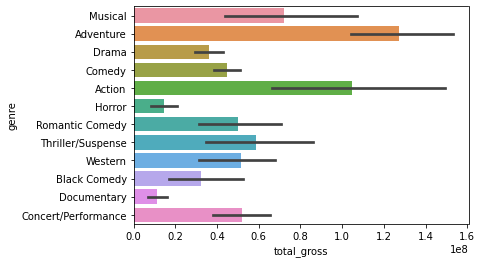

<Figure size 576x288 with 0 Axes>

In [ ]:
sns.barplot(y='genre',x='total_gross',data=df)
plt.figure(figsize=(8,4))


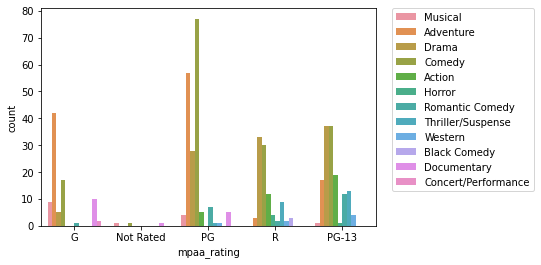

In [ ]:
sns.countplot(x='mpaa_rating',hue='genre',data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)